# CNN-LSTM gold price prediction
A CNN–LSTM model for gold price time-series forecasting

Paper: "Livieris, I.E., Pintelas, E. & Pintelas, P. A CNN–LSTM model for gold price time-series forecasting. Neural Comput & Applic 32, 17351–17360 (2020). https://doi.org/10.1007/s00521-020-04867-x"

In this paper, two versions of the CNN-LST model are proposed for gold price forecasting.

## Data Processing
In this paper, a data set containing daily gold prices between January 2014 and April 2018 is used. However, we used a data set containing gold prices between January 2020 and April 2024.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
# Symbol for Gold price
ticker_symbol = 'GC=F'

Comparison Between GLD and GC=F
GLD (SPDR Gold Shares ETF)
Definition:
GLD represents an exchange-traded fund (ETF) that tracks the price of gold. It allows investors to gain exposure to gold prices without owning physical gold.
Characteristics:
GLD prices are influenced by the underlying gold price but also include fund-related factors like management fees, market demand for the ETF, and trading volume.
While GLD correlates strongly with spot gold prices, it is not a direct representation of the actual gold price.
Use Case:
GLD is ideal for studies analyzing investor sentiment, market demand, or ETF-specific dynamics.
GC=F (Gold Futures)
Definition:
GC=F represents the gold futures contracts traded on the COMEX (Commodity Exchange), reflecting the market's expectations for future gold prices.
Characteristics:
Futures prices closely track the spot price of gold, adjusted for carrying costs, interest rates, and other market factors.
GC=F provides a direct representation of the financial market's view on gold's value, making it ideal for studies focused on forecasting or analyzing gold price trends.
Use Case:
GC=F is particularly useful for forecasting models aiming to predict gold price movements, as it represents the raw price movements more accurately.
Why GC=F Is More Suitable for This Study
Direct Representation of Gold Price Trends:

The study focuses on predicting daily gold prices and their movements. GC=F, as a futures price, directly reflects the financial market's perception of gold's value with minimal external noise.
GLD, while useful, includes ETF-specific factors such as demand fluctuations and fees, which may introduce unnecessary complexity for pure price prediction.
Consistency with the Study's Objective:

The study uses daily gold prices obtained from Yahoo Finance and applies transformations like natural logarithms to stabilize price variability. These steps align more closely with the nature of GC=F futures data, which directly represents daily gold price fluctuations.
Standard Practice in Gold Price Analysis:

Many financial and academic studies use futures prices (e.g., GC=F) for modeling and forecasting because they reflect the underlying asset's intrinsic value and market sentiment.
Conclusion
While both GLD and GC=F are viable data sources, GC=F is more suitable for this study because:

It directly represents gold price movements.
It avoids ETF-specific factors that could distort the analysis.
It aligns with the study's focus on predicting raw price changes rather than ETF performance.
Using GC=F ensures the analysis is centered on the fundamental dynamics of the gold market, making it a more appropriate choice for time-series forecasting models like CNN-LSTM.

In [6]:
# Start and end date:
start_date = '2020-01-01'
end_date = '2024-04-30'

In [7]:
gold_data = yf.download(ticker_symbol, start=start_date, end=end_date)
gold_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2020-01-02 00:00:00+00:00,1524.500000,1524.500000,1528.699951,1518.000000,1518.099976,214
2020-01-03 00:00:00+00:00,1549.199951,1549.199951,1552.699951,1530.099976,1530.099976,107
2020-01-06 00:00:00+00:00,1566.199951,1566.199951,1580.000000,1560.400024,1580.000000,416
2020-01-07 00:00:00+00:00,1571.800049,1571.800049,1576.300049,1558.300049,1558.300049,47
2020-01-08 00:00:00+00:00,1557.400024,1557.400024,1604.199951,1552.300049,1579.699951,236


### Data Analysis

In [8]:
mean_price = gold_data['Close'].mean()  # Mean
std_price = gold_data['Close'].std()    # Variance

In [9]:
gold_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,1851.552112,1851.552112,1860.923622,1842.197059,1851.375092,4461.715993
std,141.439907,141.439907,141.640683,141.389413,141.317781,24364.902504
min,1477.300049,1477.300049,1484.000000,1452.099976,1469.300049,0.000000
25%,1766.149963,1766.149963,1775.750000,1759.350006,1767.250031,82.000000
50%,1839.850037,1839.850037,1846.799988,1829.950012,1839.500000,249.500000
75%,1936.524994,1936.524994,1946.249969,1927.324982,1936.599976,667.000000
max,2398.399902,2398.399902,2429.000000,2377.300049,2384.199951,251274.000000


In [10]:
gold_data['Close'].describe()

Ticker,GC=F
count,1088.000000
mean,1851.552112
std,141.439907
min,1477.300049
25%,1766.149963
50%,1839.850037
75%,1936.524994
max,2398.399902


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 1. Basic Statistics
mean_price = gold_data['Close'].mean()  # Mean closing price
std_price = gold_data['Close'].std()    # Standard deviation of closing price
median_price = gold_data['Close'].median()  # Median closing price

In [14]:
# 2. Missing Values Check
gold_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,GC=F,0
Close,GC=F,0
High,GC=F,0
Low,GC=F,0
Open,GC=F,0
Volume,GC=F,0


In [15]:
# 3. Date Range of the Dataset
date_range = (gold_data.index.min(), gold_data.index.max())

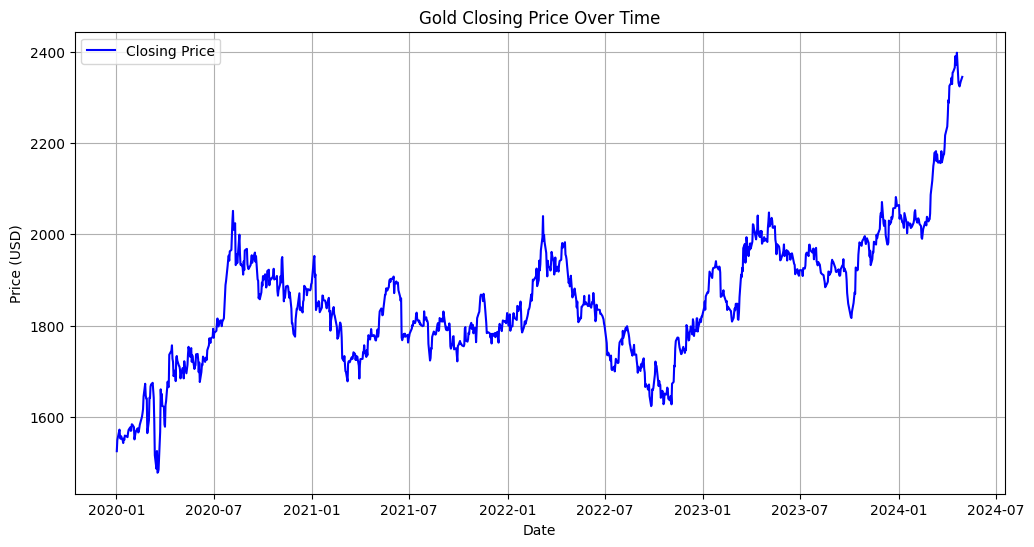

In [16]:
# 4. Plot Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Closing Price', color='blue')
plt.title('Gold Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

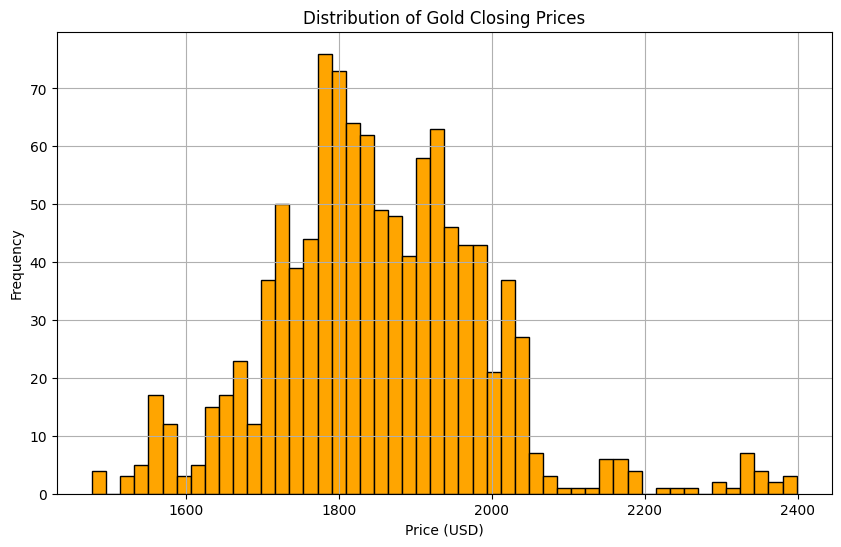

In [17]:
# 5. Distribution of Closing Prices
plt.figure(figsize=(10, 6))
plt.hist(gold_data['Close'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Gold Closing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [18]:
# 6. Rolling Statistics (Moving Average)
gold_data['Close_MA50'] = gold_data['Close'].rolling(window=50).mean()  # 50-day moving average
gold_data['Close_MA200'] = gold_data['Close'].rolling(window=200).mean()  # 200-day moving average

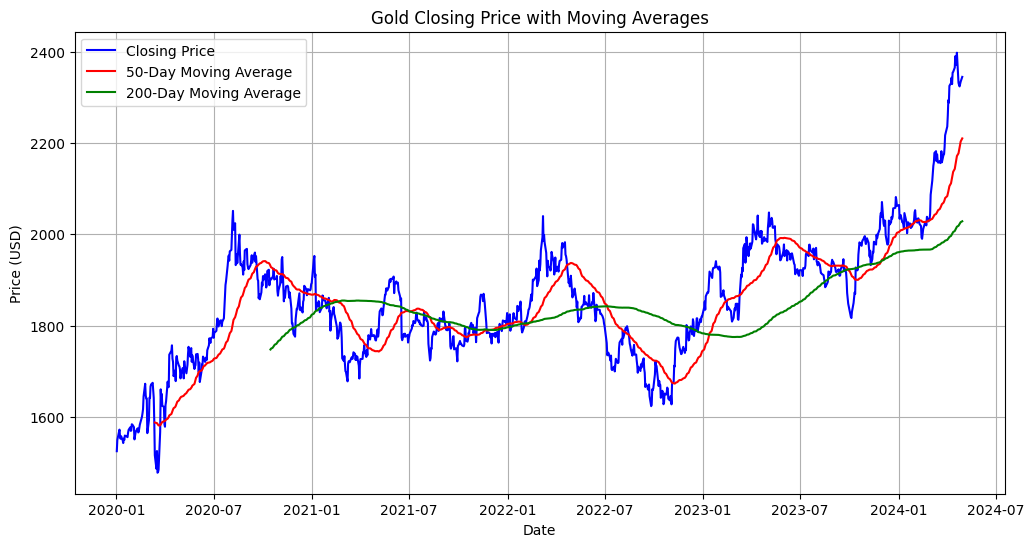

In [19]:
# Plot with Rolling Averages
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Closing Price', color='blue')
plt.plot(gold_data['Close_MA50'], label='50-Day Moving Average', color='red')
plt.plot(gold_data['Close_MA200'], label='200-Day Moving Average', color='green')
plt.title('Gold Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [21]:
# 7. Correlation Analysis
correlation_matrix = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
correlation_matrix

,Price,Open,High,Low,Close,Adj Close,Volume
,Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Price,Ticker,,,,,,
Open,GC=F,1.000000,0.996882,0.995961,0.993359,0.993359,-0.004783
High,GC=F,0.996882,1.000000,0.994490,0.996244,0.996244,-0.011022
Low,GC=F,0.995961,0.994490,1.000000,0.997320,0.997320,0.002347
Close,GC=F,0.993359,0.996244,0.997320,1.000000,1.000000,-0.003925
Adj Close,GC=F,0.993359,0.996244,0.997320,1.000000,1.000000,-0.003925
Volume,GC=F,-0.004783,-0.011022,0.002347,-0.003925,-0.003925,1.000000


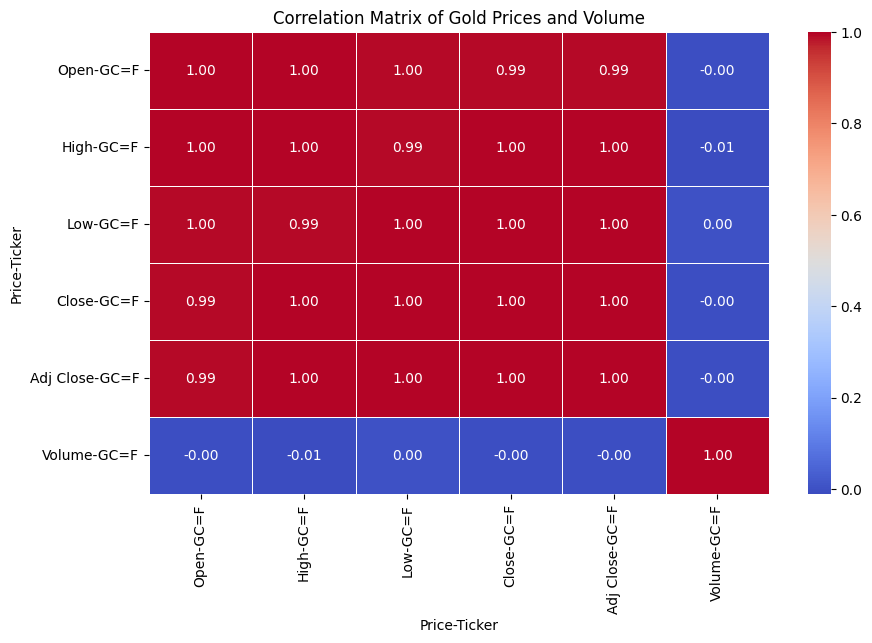

In [24]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Gold Prices and Volume')
plt.show()

### Data Pre-processing
1. Logarithmic Transformation
Objective:
To stabilize the variability in gold prices.
To make the dataset more suitable for learning by reducing exponential trends.
Description:
The natural logarithm (ln⁡) is applied to the daily gold prices:
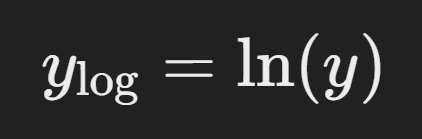
where 𝑦 y is the original price.
Reason:
It compresses large values and reduces the impact of outliers.
Stabilizes non-linear patterns in the time series.
2. Splitting the Data
Objective:
To create separate training and testing datasets.
Description:
The paper divides the data into:
Training set: Past prices (80% of the dataset).
Testing set: Future prices (20% of the dataset).
Reason:
Ensures the model is evaluated on unseen data for accurate performance assessment.
3. Sliding Window for Time Series
Objective:
To create sequences of fixed-length inputs for the model to learn temporal dependencies.
Description:
A sliding window approach is used:
For each sequence of
𝑛
n days, the next day's price is predicted.
Example: Given prices of days 1–10, predict the price for day 11.
Reason:
Allows the model to capture short-term dependencies in the data.

In [25]:
# Applying Logaritmic transformation
gold_data['Log_Close'] = np.log(gold_data['Close'])

In [26]:
gold_data['Log_Close'].head()

,Log_Close
Date,
2020-01-02 00:00:00+00:00,7.329422
2020-01-03 00:00:00+00:00,7.345494
2020-01-06 00:00:00+00:00,7.356408
2020-01-07 00:00:00+00:00,7.359977
2020-01-08 00:00:00+00:00,7.350773


In [27]:
# Train test split
train_size = int(len(gold_data) * 0.8)
train_data = gold_data.iloc[:train_size]
test_data = gold_data.iloc[train_size:]

In [28]:
train_data

Price,Adj Close,Close,High,Low,Open,Volume,Close_MA50,Close_MA200,Log_Close
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F,,,
Date,,,,,,,,,
2020-01-02 00:00:00+00:00,1524.500000,1524.500000,1528.699951,1518.000000,1518.099976,214,NaN,NaN,7.329422
2020-01-03 00:00:00+00:00,1549.199951,1549.199951,1552.699951,1530.099976,1530.099976,107,NaN,NaN,7.345494
2020-01-06 00:00:00+00:00,1566.199951,1566.199951,1580.000000,1560.400024,1580.000000,416,NaN,NaN,7.356408
2020-01-07 00:00:00+00:00,1571.800049,1571.800049,1576.300049,1558.300049,1558.300049,47,NaN,NaN,7.359977
2020-01-08 00:00:00+00:00,1557.400024,1557.400024,1604.199951,1552.300049,1579.699951,236,NaN,NaN,7.350773
...,...,...,...,...,...,...,...,...,...
2023-06-09 00:00:00+00:00,1962.199951,1962.199951,1969.800049,1960.300049,1965.099976,49,1990.937998,1837.190000,7.581822
2023-06-12 00:00:00+00:00,1955.300049,1955.300049,1963.500000,1951.400024,1959.699951,212,1990.437998,1838.227500,7.578299


In [29]:
test_data

Price,Adj Close,Close,High,Low,Open,Volume,Close_MA50,Close_MA200,Log_Close
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F,,,
Date,,,,,,,,,
2023-06-16 00:00:00+00:00,1958.400024,1958.400024,1962.900024,1953.500000,1961.400024,119,1986.840000,1842.540001,7.579883
2023-06-20 00:00:00+00:00,1935.500000,1935.500000,1958.599976,1931.300049,1958.599976,193,1985.312000,1843.653501,7.568121
2023-06-21 00:00:00+00:00,1933.300049,1933.300049,1936.800049,1920.000000,1935.599976,557,1984.196001,1844.837001,7.566984
2023-06-22 00:00:00+00:00,1912.699951,1912.699951,1921.000000,1912.099976,1920.000000,237,1982.353999,1845.851501,7.556271
2023-06-23 00:00:00+00:00,1919.099976,1919.099976,1932.500000,1918.699951,1918.699951,105,1980.517998,1846.945001,7.559612
...,...,...,...,...,...,...,...,...,...
2024-04-23 00:00:00+00:00,2327.699951,2327.699951,2330.800049,2294.199951,2327.699951,171,2183.855994,2020.907995,7.752636
2024-04-24 00:00:00+00:00,2324.500000,2324.500000,2328.699951,2314.600098,2321.300049,95,2189.981995,2022.905495,7.751260


In [30]:
# Create Sequence usin sliding window (10)
def create_time_series(data, time_stemps):
  X, y = [], []
  prices = data['Log_Close'].values
  for i in range(len(prices) - time_stemps):
    X.append(prices[i:i+time_stemps]) # input: sequence of time_stemps
    y.append(prices[i+time_stemps]) # output: next valur in the sequence
  return np.array(X) , np.array(y)

In [34]:
time_steps = 10

In [35]:
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [36]:
print(f"Training set X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing set X shape: {X_test.shape}, y shape: {y_test.shape}")

Training set X shape: (860, 10), y shape: (860,)
Testing set X shape: (208, 10), y shape: (208,)


In [37]:
# Build models
input_shape = (X_train.shape[1], 1)  # (time_steps, num_features)

## CNN-LSTM1

Fig 1.
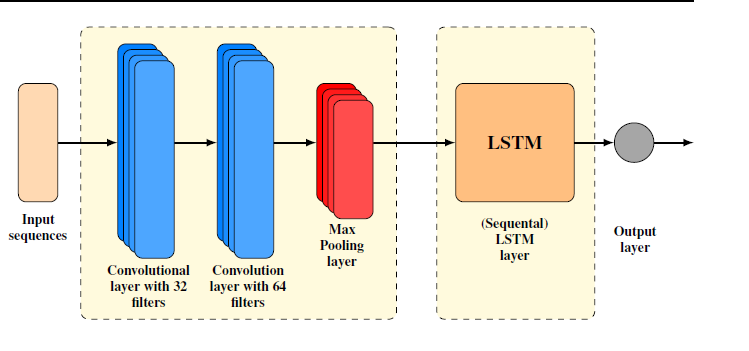

In [38]:
# Import library
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

In [39]:
# Model parameter
#input_shape = (None, 1)
conv_filters_1 = 32
conv_filters_2 = 64
pool_size = 2
lstm_units = 100
dense_units = 1

In [40]:
model = Sequential()

In [41]:
model.add(Conv1D(filters=conv_filters_1, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(Conv1D(filters=conv_filters_2, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(units=lstm_units, return_sequences=False))
model.add(Dense(units=dense_units, activation='sigmoid')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 8, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,357 (274.83 KB)

 Trainable params: 70,357 (274.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Test and train data

In [44]:
# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 49.5372 - mae: 7.0358 - val_loss: 45.0208 - val_mae: 6.7095
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 43.1174 - mae: 6.5661 - val_loss: 43.8598 - val_mae: 6.6224
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 42.3611 - mae: 6.5083 - val_loss: 43.7537 - val_mae: 6.6144
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 42.3396 - mae: 6.5066 - val_loss: 43.7323 - val_mae: 6.6127
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 42.2782 - mae: 6.5019 - val_loss: 43.7252 - val_mae: 6.6122
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 42.2756 - mae: 6.5017 - val_loss: 43.7222 - val_mae: 6.6120
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 42.2571 - mae: 6.5003 - val_loss: 43.7205 - val_mae: 6.6119
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 42.2350 - mae: 6.4986 - val_loss: 43.7196 - val_mae: 6.6118
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 42.2623

In [45]:
# Results evaluating
results = model.evaluate(X_test, y_test)
print(f'Test loss: {results[0]}')
print(f'Test MAE: {results[1]}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.3629 - mae: 6.5849 
Test loss: 43.714412689208984
Test MAE: 6.611394882202148


In [47]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_1 = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 42.2079 - mae: 6.4965 - val_loss: 43.7143 - val_mae: 6.6114
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.2802 - mae: 6.5021 - val_loss: 43.7143 - val_mae: 6.6114
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.2469 - mae: 6.4995 - val_loss: 43.7142 - val_mae: 6.6114
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.2192 - mae: 6.4974 - val_loss: 43.7142 - val_mae: 6.6114
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.2836 - mae: 6.5023 - val_loss: 43.7141 - val_mae: 6.6114
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.2671 - mae: 6.5011 - val_loss: 43.7141 - val_mae: 6.6114
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.2600 - mae: 6.5005 - val_loss: 43.7140 - val_mae: 6.6114
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.2902 - mae: 6.5028 - val_loss: 43.7140 - val_mae: 6.6114
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

## CNN-LSTM2

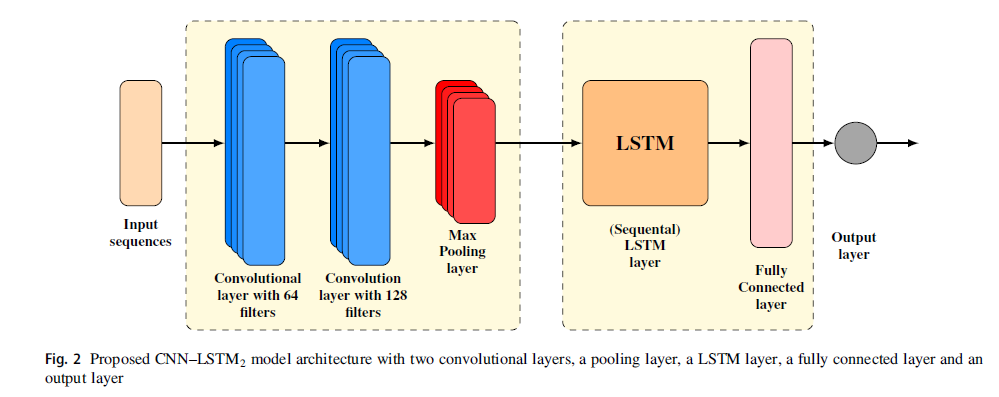

In [48]:
model_2 = Sequential()

model_2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
model_2.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))

model_2.add(LSTM(units=lstm_units, return_sequences=False))
model_2.add(Dense(units=32, activation='relu'))

model_2.add(Dense(units=1, activation='linear')) # Output Layer

In [50]:
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 8, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,357 (274.83 KB)

 Trainable params: 70,357 (274.83 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Model training
history = model_2.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 49.9727 - mae: 7.0263 - val_loss: 25.9042 - val_mae: 5.0893
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 19.4858 - mae: 4.3660 - val_loss: 5.9423 - val_mae: 2.4371
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.4710 - mae: 1.7665 - val_loss: 0.0167 - val_mae: 0.1160
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2195 - mae: 0.3570 - val_loss: 0.7007 - val_mae: 0.8350
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7485 - mae: 0.8563 - val_loss: 0.0942 - val_mae: 0.3010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0999 - mae: 0.2894 - val_loss: 0.0276 - val_mae: 0.1546
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0179 - mae: 0.1135 - val_loss: 0.1138 - val_mae: 0.3319
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0513 - mae: 0.2186 - val_loss: 0.0722 - val_mae: 0.2618
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0180 - mae: 0.1200

In [55]:
results = model_2.evaluate(X_test, y_test)
print(f'Test loss: {results[0]}')
print(f'Test MAE: {results[1]}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - mae: 0.0813
Test loss: 0.015068520791828632
Test MAE: 0.10694821178913116
